# 1. Configuración del ambiente

In [1]:
#Pablo
#Importamos las librearías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


# 2. Preprocesamiento de datos

In [2]:
dataset = pd.read_csv('german_credit.csv')
df_banco = dataset.copy()
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
#Pablo
#Verificamos las estructuras de datos y si hay nulos
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

Eliminamos duplicados

In [4]:
#Pablo
#Verificamos si hay duplicados
df_banco.duplicated().sum()

0

In [5]:
#Pablo
#Verificamos si hay nulos
df_banco.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [6]:
import json

# Cargar los valores desde el archivo JSON
with open('dictionaries.json', 'r') as json_file:
    dictionaries = json.load(json_file)

# Acceder a la variable 
print(dictionaries)


[{'column_name': 'account_check_status', 'values': {'< 0 DM': 1, '0 <= ... < 200 DM': 2, '>= 200 DM / salary assignments for at least 1 year': 3, 'no checking account': 4}}, {'column_name': 'credit_history', 'values': {'no credits taken/ all credits paid back duly': 1, 'all credits at this bank paid back duly': 2, 'existing credits paid back duly till now': 3, 'delay in paying off in the past': 4, 'critical account/ other credits existing (not at this bank)': 5}}, {'column_name': 'purpose', 'values': {'car (new)': 1, 'car (used)': 2, 'furniture/equipment': 3, 'radio/television': 4, 'domestic appliances': 5, 'repairs': 6, 'education': 7, '(vacation - does not exist?)': 8, 'retraining': 9, 'business': 10, 'others': 11}}, {'column_name': 'savings', 'values': {'... < 100 DM': 5, '100 <= ... < 500 DM': 4, '500 <= ... < 1000 DM ': 3, '.. >= 1000 DM ': 2, 'unknown/ no savings account': 1}}, {'column_name': 'present_emp_since', 'values': {'unemployed': 5, '... < 1 year ': 4, '1 <= ... < 4 year

In [7]:
type(dictionaries)

list

In [8]:
#Pablo
#Creamos la función procesar_datos() y la ejecutamos luego y vemos el resultado almacenado en df_blanco()
def procesar_datos():
  df_banco.drop_duplicates() #Borra los valores duplicados del DataFrame
  df_banco.dropna() #Borra los valores nulos del DataFrame

#Ciclo for para iterar los valores del diccionario y remplazarlos por valores categoricos
  for item in dictionaries: 
    column = item['column_name'] #Itera sobre cada columna del diccionario
    new_values = item['values'] #Obtiene el nombre de la columna del diccionario actual y lo almacena en la variable
    df_banco[column] = df_banco[column].map(new_values) #La función .map de pandas aplica el mapeo de los nuevos valores

#Usamos la función creada para la limpieza de datos
procesar_datos()
#Consultamos los primeros 5 valores del DataFrame con los valores reemplazados
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,6,5,5,1169,1,1,4,3,...,4,1,67,3,2,2,3,1,1,1
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,22,3,2,1,3,1,0,1
2,0,4,12,5,8,2096,5,2,2,3,...,3,1,49,3,2,1,2,2,0,1
3,0,1,42,3,4,7882,5,2,2,3,...,4,2,45,3,3,1,3,2,0,1
4,1,1,24,4,1,4870,5,3,3,3,...,4,4,53,3,3,2,3,2,0,1


In [9]:
#Pablo
#Verificamos si después de la sustitución quedó algún valor nulo
df_banco.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [10]:
#Pablo
#Verificamos si las estructuras de datos de las columnas son las correctas
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int64
 2   duration_in_month           1000 non-null   int64
 3   credit_history              1000 non-null   int64
 4   purpose                     1000 non-null   int64
 5   credit_amount               1000 non-null   int64
 6   savings                     1000 non-null   int64
 7   present_emp_since           1000 non-null   int64
 8   installment_as_income_perc  1000 non-null   int64
 9   personal_status_sex         1000 non-null   int64
 10  other_debtors               1000 non-null   int64
 11  present_res_since           1000 non-null   int64
 12  property                    1000 non-null   int64
 13  age                         1000 non-null   int64
 14  other_ins

# 3. Exploración de datos

In [11]:
#Pablo
#Ciclo que itera las columnas hasta encontrar personal_status_sex y asigna un valor
for item in dictionaries:
  if(item['column_name'] == 'personal_status_sex'):
    print(item['values'])


{'male : divorced/separated': 1, 'female : divorced/separated/married': 2, 'male : single': 3, 'male : married/widowed': 4, 'female : single\t': 5}


In [12]:
#edwin
def feature_engineering(df_banco):
    #mapeando el sexo
    sex_mapping = {1: 0,  2: 1,  3: 0,  4: 0,  5: 1}
    # Crear variable de variable sexo
    df_banco['sexo'] = df_banco['personal_status_sex'].map(sex_mapping)
    #mapeando el estado
    civil_mapping = {1: 0, 2: 0, 3: 1, 4: 0, 5: 1}
    #creacion de variable estado_civil
    df_banco['estado_civil']= df_banco['personal_status_sex'].map(civil_mapping)

    #creacion de rango de edad
    df_banco['rango_edad'] = pd.cut(x = df_banco['age'], bins=[18, 30, 40, 50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6])

    #creacion de variable rango_plazos_credito
    df_banco['rango_plazos_credito'] = pd.cut(x = df_banco['duration_in_month'], bins=[1,12,24,36,48,60,72], labels = [1,2,3,4,5,6])

    #creditos y rangos
    creditos = [1,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,
            11000,12000,13000,14000,15000,16000,17000,18000,19000,20000]
    niveles = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    #creacion de variable rango_valor_credito
    df_banco['rango_valor_credito'] = pd.cut(x= df_banco['credit_amount'], bins=creditos, labels=niveles)
    # Quitamos la eliminación de duration_in_month y age para que persista esa información y reagruparla después
    columnas_a_eliminar = ['personal_status_sex', 'credit_amount']
    df_banco = df_banco.drop(columns=columnas_a_eliminar, axis=1)

    return df_banco


In [13]:
#edwin
df_banco = feature_engineering(df_banco)
df_banco.head(10)

,default,account_check_status,duration_in_month,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,...,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,6,5,5,1,1,4,1,4,...,2,3,1,1,1,0,1,5,1,2
1,1,2,48,3,5,5,3,2,1,2,...,1,3,1,0,1,1,0,1,4,6
2,0,4,12,5,8,5,2,2,1,3,...,1,2,2,0,1,0,1,3,1,3
3,0,1,42,3,4,5,2,2,3,4,...,1,3,2,0,1,0,1,3,4,8
4,1,1,24,4,1,5,3,3,1,4,...,2,3,2,0,1,0,1,4,2,5
5,0,4,36,3,8,1,3,2,1,4,...,1,2,2,1,1,0,1,2,3,10
6,0,4,24,3,4,3,1,3,1,4,...,1,3,1,0,1,0,1,4,2,3
7,0,2,36,3,2,5,3,2,1,2,...,1,4,1,1,1,0,1,2,3,7
8,0,4,12,3,5,2,2,2,1,4,...,1,2,1,0,1,0,0,5,1,4
9,1,2,30,5,1,5,5,4,1,2,...,2,4,1,0,1,0,0,1,3,6


In [174]:
#edwin
def analisis_exploratorio(df_bank):
    # Histogramas
    area=plt.figure(figsize=(20, 20))
    g1 = area.add_subplot(2,2,1)
    g2 = area.add_subplot(2,2,2)
    g3 = area.add_subplot(2,2,3)
    g4 = area.add_subplot(2,2,4)

    g1.hist(df_bank.sexo)    #histograma del sexo de la población
    g1.set_title('Histograma de sexo de la población')
    g2.hist(df_bank.estado_civil)  #histograma del estado civil de la población
    g2.set_title('Histograma del estado civil de la población')
    g3.hist(df_bank.rango_plazos_credito) #histograma de los plazos de credito
    g3.set_title('Histograma de los plazos de credito')
    g4.hist(df_bank.rango_edad)  #histograma del rango de edad
    g4.set_title('Histograma del rango de edades de la población')
    #default
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_banco, x='default')
    plt.title('Histograma default')
    plt.show()
    # Gráfico de correlación
    correlacion = df_banco.corr()
    df_default = pd.DataFrame(correlacion['default'])

    plt.figure(figsize=(2, 8))
    sns.heatmap(df_default, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title('Matriz de Correlación')
    plt.show()

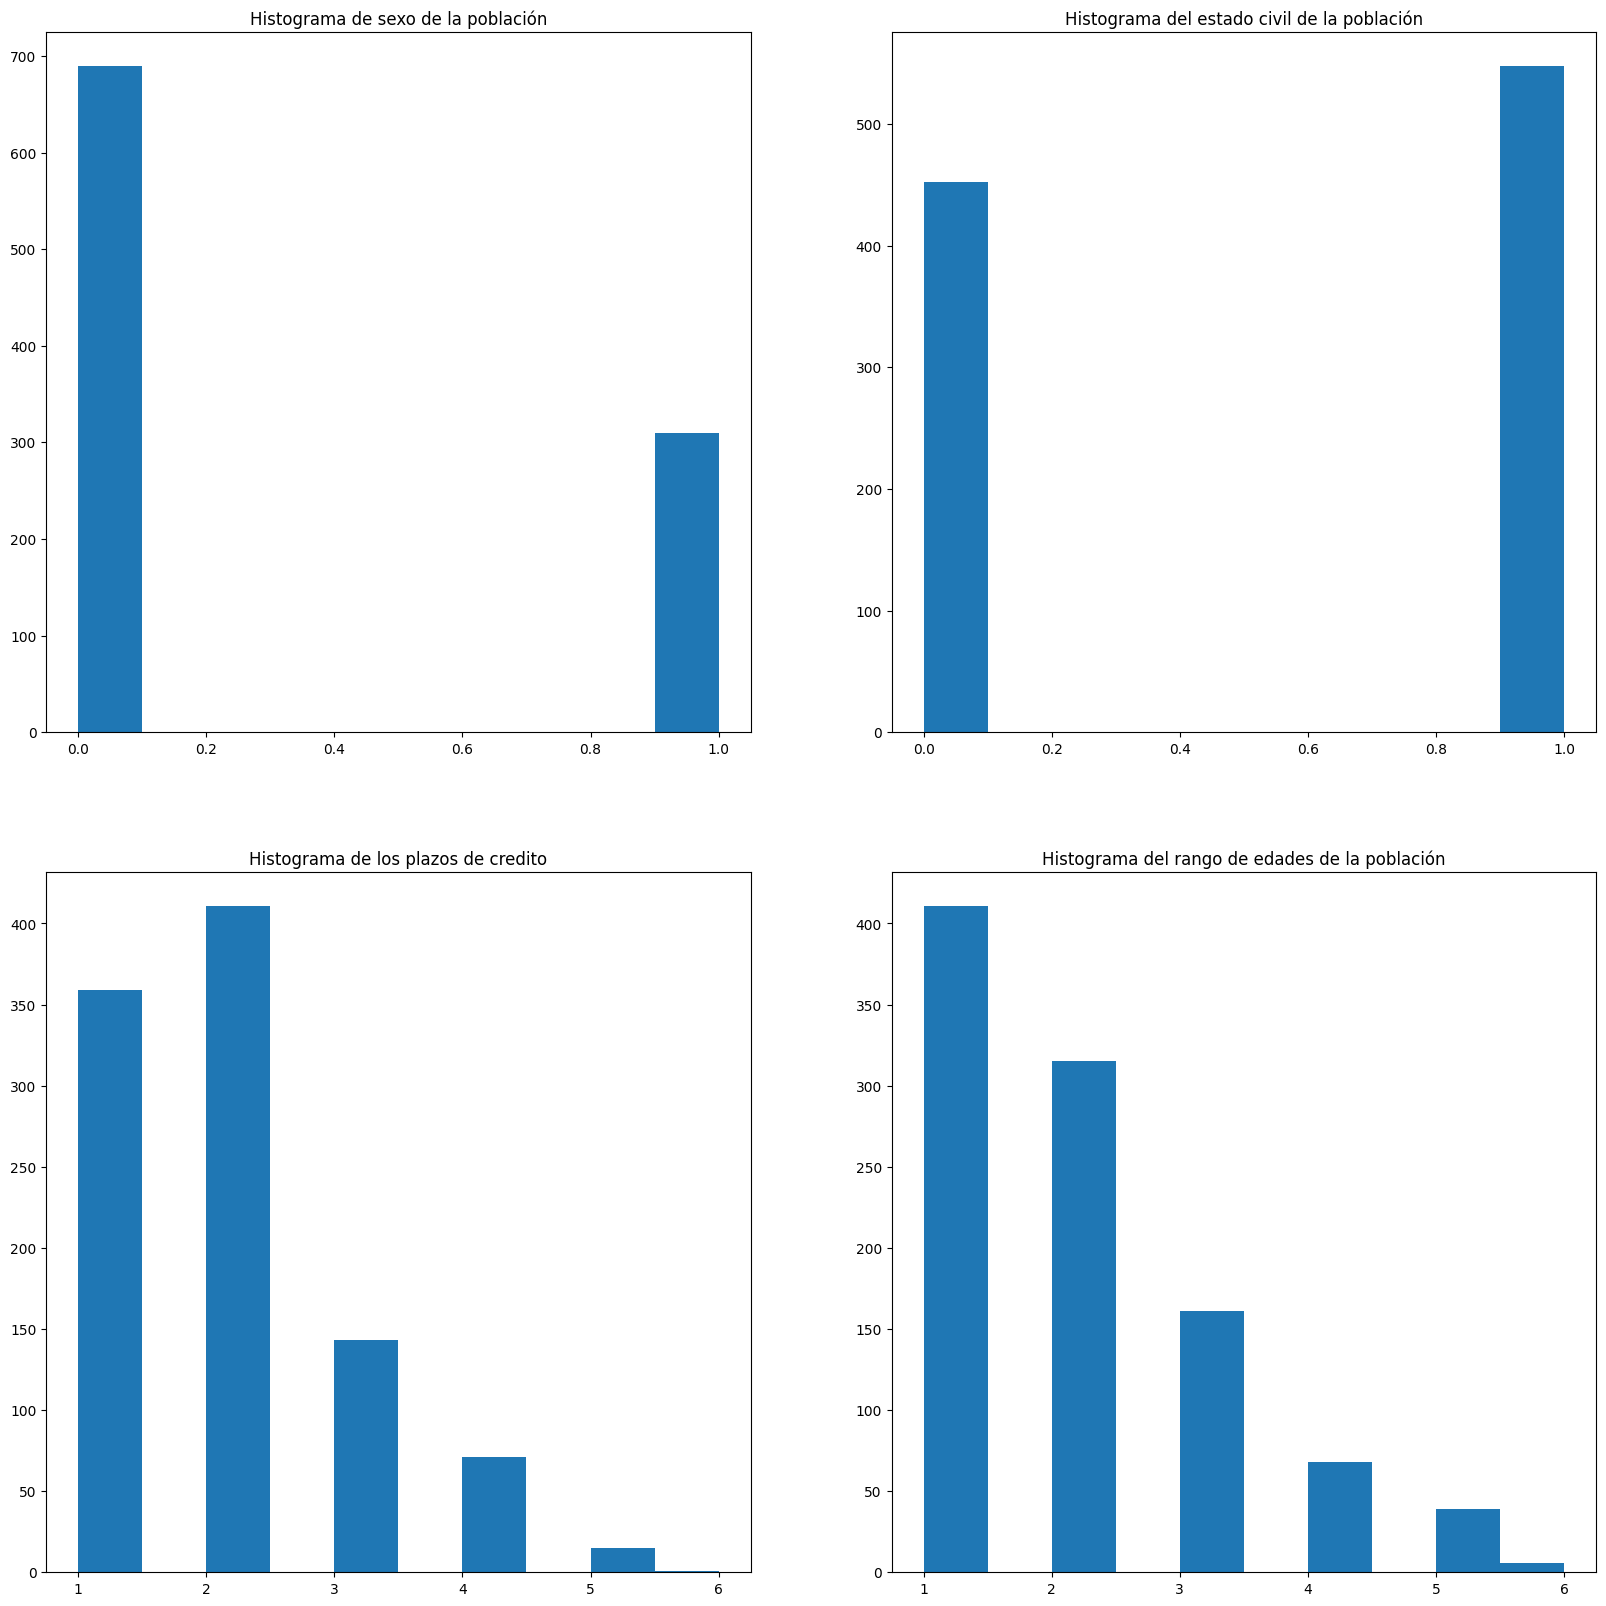

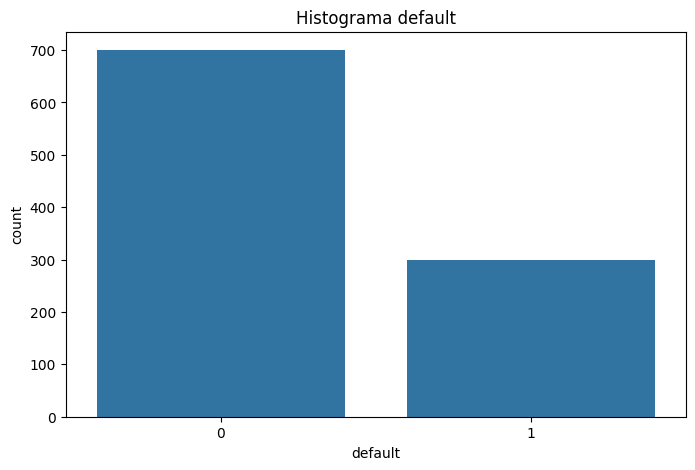

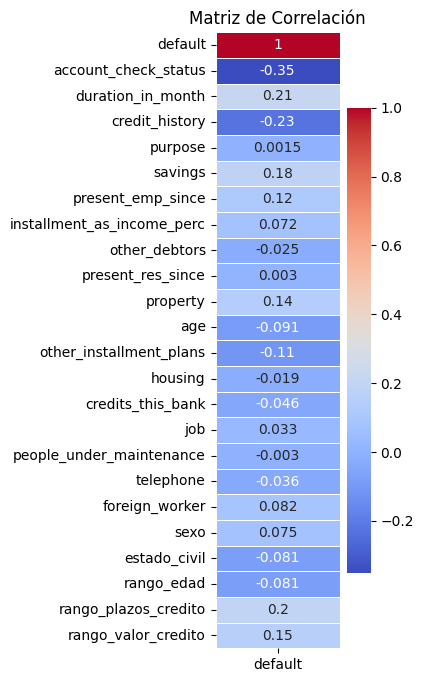

In [175]:
#edwin
analisis_exploratorio(df_banco)

In [176]:
df_banco["rango_plazos_credito"].value_counts()

rango_plazos_credito
2    411
1    359
3    143
4     71
5     15
6      1
Name: count, dtype: int64

In [177]:
def feature_engineering_refactor(df_banco):
    #age: (numerical)
	#Age in years
		#1 : 18 <= ... < 30
		#2 : 30 <= ... < 40
		#3 : 40 <= ... < 50
		#4 : 50 <= ... < 60
		#5 : 60 <= ... < 80
    #duration_in_month:  (numerical)
	#Duration in month
		#1 :  1 <= ... < 12
	    #2 : 12 <= ... < 24
		#3 : 24 <= ... < 36
		#4 : 36 <= ... < 48
		#5 : 48 <= ... < 72
    df_banco['rango_plazos_credito_2'] = pd.cut(x = df_banco['duration_in_month'], bins=[1,12,24,36,48,72], labels = [1,2,3,4,5])
    df_banco['rango_edad_2'] = pd.cut(x = df_banco['age'], bins=[18, 30, 40, 50, 60, 80], labels = [1, 2, 3, 4, 5])
    
    return df_banco

In [178]:
df_banco = feature_engineering_refactor(df_banco)

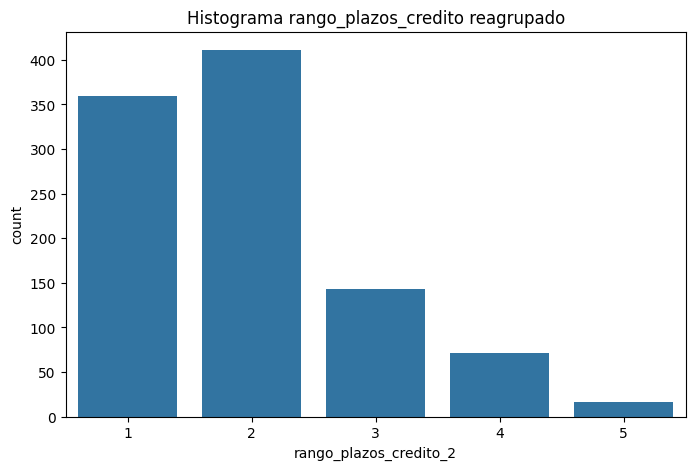

In [179]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_banco, x='rango_plazos_credito_2')
plt.title('Histograma rango_plazos_credito reagrupado')
plt.show()

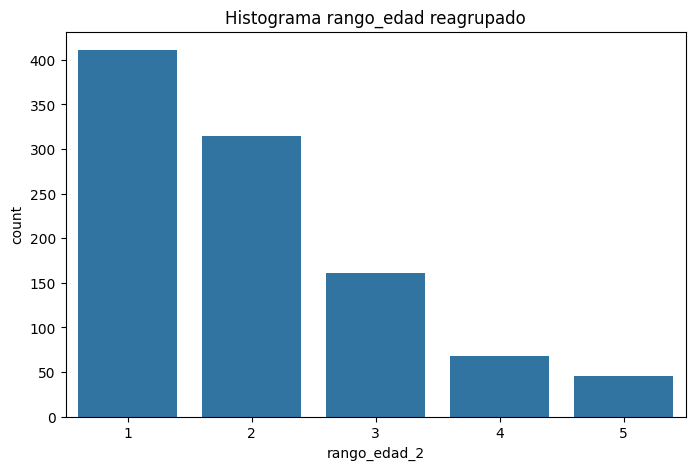

In [180]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_banco, x='rango_edad_2')
plt.title('Histograma rango_edad reagrupado')
plt.show()

In [181]:
#Pablo

#Creo una matriz de correlación del df
corr_matrix = df_banco.corr()

#Creo un método que me obtenga el nombre de todas las columnas en un intervalo de correlación de [0.005; -0.005]
def get_low_corr(corr_matrix, column):
  low_corr_colums = []
  for index, value in corr_matrix[column].items():
    name = index
    if (value > -0.005) & (value < 0.005):
      print(name, value)
      low_corr_colums.append(name)
  return low_corr_colums

#Almaceno en low_corr_columns una lista con los nombres de las columnas que cumplan esa condición
low_corr_columns = get_low_corr(corr_matrix, 'default')
print(low_corr_columns)

purpose 0.0015143327484174963
present_res_since 0.002967158754155301
people_under_maintenance -0.003014853083344615
['purpose', 'present_res_since', 'people_under_maintenance']


In [182]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   default                     1000 non-null   int64   
 1   account_check_status        1000 non-null   int64   
 2   duration_in_month           1000 non-null   int64   
 3   credit_history              1000 non-null   int64   
 4   purpose                     1000 non-null   int64   
 5   savings                     1000 non-null   int64   
 6   present_emp_since           1000 non-null   int64   
 7   installment_as_income_perc  1000 non-null   int64   
 8   other_debtors               1000 non-null   int64   
 9   present_res_since           1000 non-null   int64   
 10  property                    1000 non-null   int64   
 11  age                         1000 non-null   int64   
 12  other_installment_plans     1000 non-null   int64   
 13  housing            

In [183]:
df_banco.drop(low_corr_columns, axis=1, inplace=True)

In [184]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   default                     1000 non-null   int64   
 1   account_check_status        1000 non-null   int64   
 2   duration_in_month           1000 non-null   int64   
 3   credit_history              1000 non-null   int64   
 4   savings                     1000 non-null   int64   
 5   present_emp_since           1000 non-null   int64   
 6   installment_as_income_perc  1000 non-null   int64   
 7   other_debtors               1000 non-null   int64   
 8   property                    1000 non-null   int64   
 9   age                         1000 non-null   int64   
 10  other_installment_plans     1000 non-null   int64   
 11  housing                     1000 non-null   int64   
 12  credits_this_bank           1000 non-null   int64   
 13  job                

In [185]:
df_banco["default"].value_counts()

default
0    700
1    300
Name: count, dtype: int64

In [186]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)
y = df_banco['default'].copy()
x = df_banco.copy()
x = x.drop('default', axis= 1)

In [187]:
smt_x, smt_y = smt.fit_resample(x, y)

In [188]:
smt_y.shape[0]

1400

In [189]:
smt_y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [190]:
df_banco_final = pd.concat([smt_y, smt_x],axis = 1)

In [191]:
df_banco_final.drop(['rango_edad', 'rango_plazos_credito', 'age', 'duration_in_month'], axis= 1, inplace=True)

In [192]:
df_banco_final.rename({'rango_plazos_credito_2': 'rango_plazos_credito', 'rango_edad_2': 'rango_edad'}, axis=1, inplace=True)
df_banco_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   default                     1400 non-null   int64   
 1   account_check_status        1400 non-null   int64   
 2   credit_history              1400 non-null   int64   
 3   savings                     1400 non-null   int64   
 4   present_emp_since           1400 non-null   int64   
 5   installment_as_income_perc  1400 non-null   int64   
 6   other_debtors               1400 non-null   int64   
 7   property                    1400 non-null   int64   
 8   other_installment_plans     1400 non-null   int64   
 9   housing                     1400 non-null   int64   
 10  credits_this_bank           1400 non-null   int64   
 11  job                         1400 non-null   int64   
 12  telephone                   1400 non-null   int64   
 13  foreign_worker    

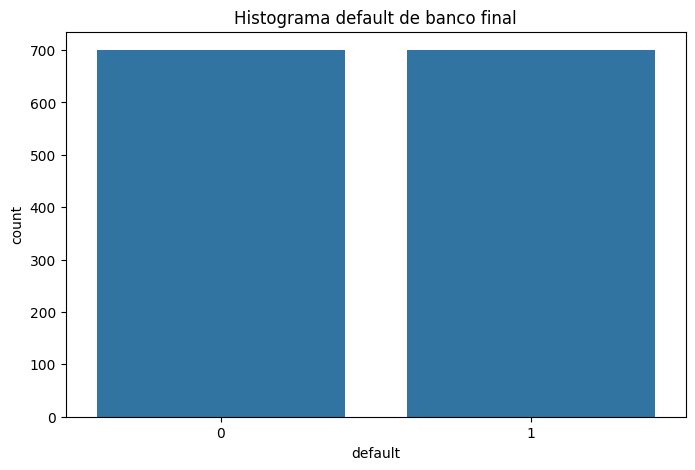

In [193]:
#default
plt.figure(figsize=(8, 5))
sns.countplot(data=df_banco_final, x='default')
plt.title('Histograma default de banco final')
plt.show()

<Axes: >

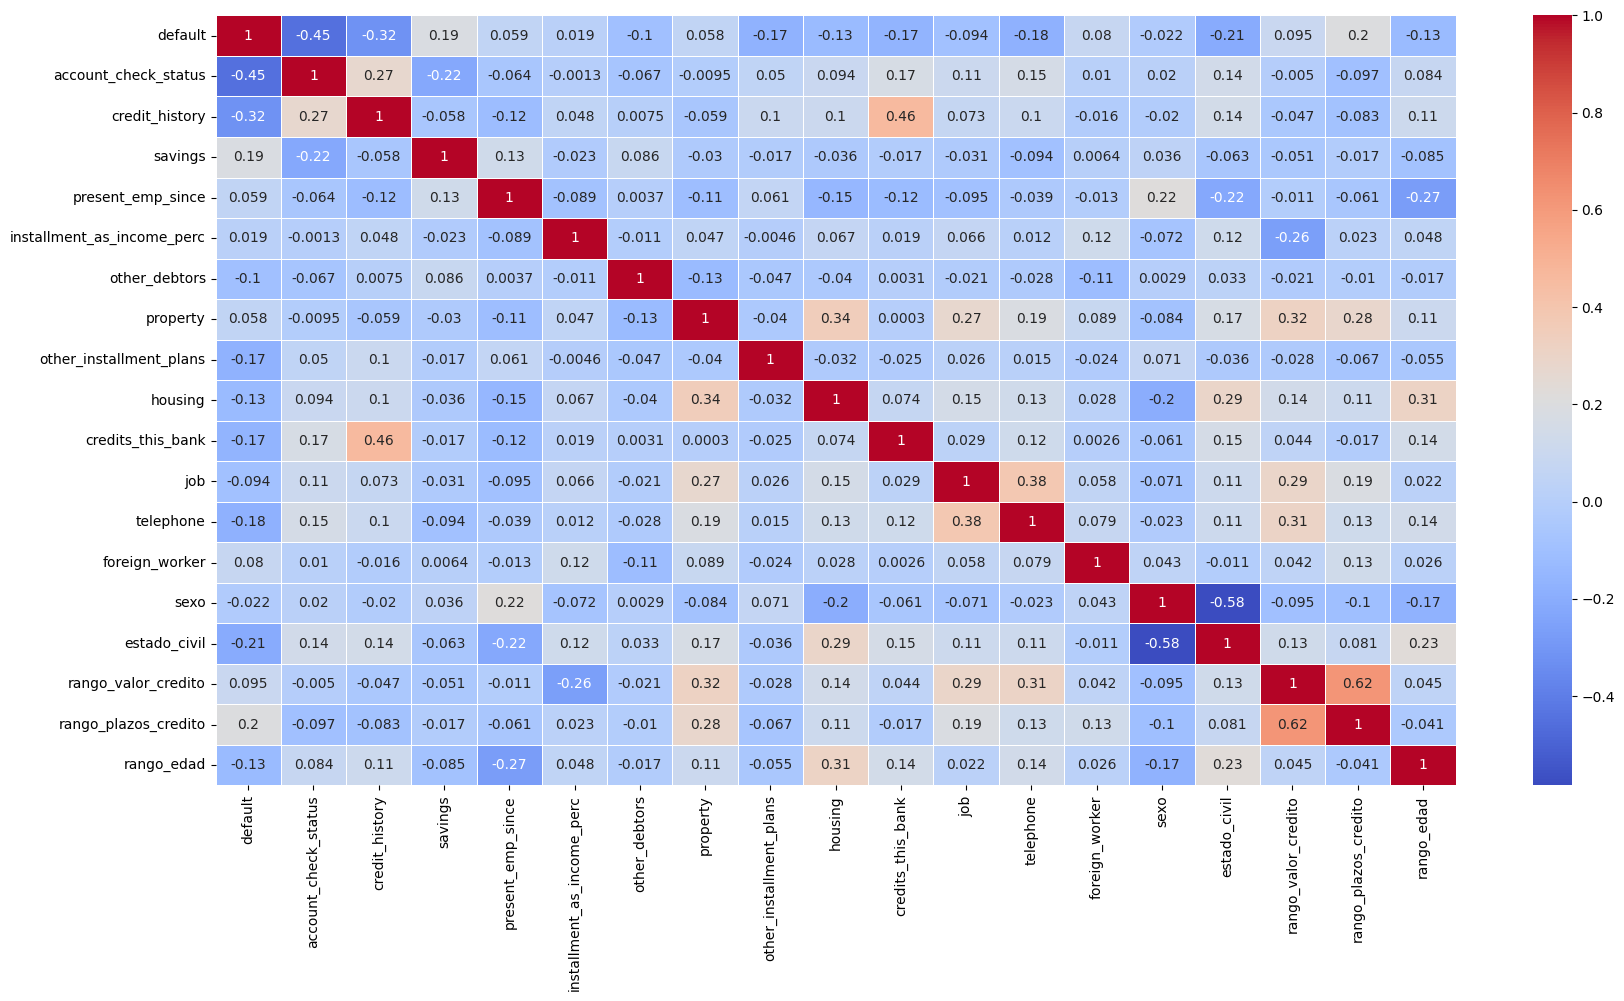

In [194]:
correlacion = df_banco_final.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=.5)

In [195]:
df_banco_final.drop(['sexo','rango_valor_credito'], axis=1, inplace=True)
df_banco_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   default                     1400 non-null   int64   
 1   account_check_status        1400 non-null   int64   
 2   credit_history              1400 non-null   int64   
 3   savings                     1400 non-null   int64   
 4   present_emp_since           1400 non-null   int64   
 5   installment_as_income_perc  1400 non-null   int64   
 6   other_debtors               1400 non-null   int64   
 7   property                    1400 non-null   int64   
 8   other_installment_plans     1400 non-null   int64   
 9   housing                     1400 non-null   int64   
 10  credits_this_bank           1400 non-null   int64   
 11  job                         1400 non-null   int64   
 12  telephone                   1400 non-null   int64   
 13  foreign_worker    

In [196]:
df_banco_final.to_csv('df_banco_final.csv', sep=';', index=False)